# Random Forest

Slides: [link](https://docs.google.com/presentation/d/18KIHEHceqyeOGEOSPFZY-GWKGejYfztpqVruwCuf-QU/edit?usp=sharing)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.model_selection import cross_val_score

### Breast Cancer Random Forest Classifier

In [4]:
bc=pd.read_csv('breast_cancer_scikit_onehot_dataset.csv')

In [5]:
target=bc['class']
target = bc['class'].map(lambda x: 1 if x == 4 else 0).values 
target = pd.Series(target)

In [6]:
predictor=bc.drop(columns=['class'])
predictor.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0


In [7]:
target.value_counts(normalize=True)

0    0.634446
1    0.365554
dtype: float64

In [8]:
# Import train_test_split function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3,random_state=9) 

In [9]:
# fit our model
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,class_weight='balanced', n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=16, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [10]:
importances = rnd_clf.feature_importances_

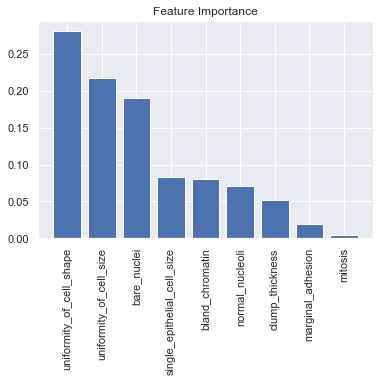

In [11]:
# creating list of column names
feat_names=list(X_train)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [12]:
# Predictions for the test data
y_pred = rnd_clf.predict(X_test)

In [13]:
yprob = rnd_clf.predict_proba(X_test)
yprob
yprob[:5]

array([[0.99866811, 0.00133189],
       [0.32245129, 0.67754871],
       [0.99899719, 0.00100281],
       [0.04962722, 0.95037278],
       [0.9985335 , 0.0014665 ]])

In [14]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[97,  4],
       [ 2, 68]])

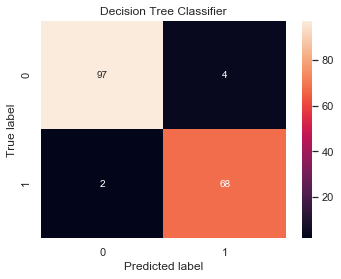

In [16]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9577464788732395

# Grid Search

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=16, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [18]:
from sklearn.model_selection import GridSearchCV
# parameters we are interested in exploring
param_grid = [{'n_estimators': [3, 10, 1000], 'max_features': [2, 4, 6, 8],  'max_leaf_nodes':[5,10,15,20],'class_weight':['balanced']},]
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,scoring='f1',return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 1000], 'max_features': [2, 4, 6, 8], 'max_leaf_nodes': [5, 10, 15, 20], 'class_weight': ['balanced']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [19]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_features': 2,
 'max_leaf_nodes': 10,
 'n_estimators': 1000}

In [20]:
y_pred = grid_search.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9707602339181286


In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9650349650349651

## Class Work 
### Implement Gradient Boosting Classifier and Grid Seach
- Use sklearn implementation

In [23]:
!pip install xgboost

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
     |████████████████████████████████| 675kB 3.4MB/s eta 0:00:01
    ERROR: Complete output from command python setup.py egg_info:
    ERROR: ++ pwd
    + oldpath=/private/var/folders/jl/8fzlq6gd5hg7j9rl05wsmjn40000gp/T/pip-install-dtyMS_/xgboost
    + cd ./xgboost/
    + echo darwin18
    + grep -q darwin
    + LIB_XGBOOST=libxgboost.dylib
    + which g++-5
    + which g++-7
    + which g++-8
    + which clang++
    /usr/bin/clang++
    + export CC=clang
    + CC=clang
    + export CXX=clang++
    + CXX=clang++
    + make clean
    Makefile:31: MAKE [/Library/Developer/CommandLineTools/usr/bin/make] - checked OK
    rm -f -rf build build_plugin lib bin *~ */*~ */*/*~ */*/*/*~ */*.o */*/*.o */*/*/*.o #xgboost
    rm -f -rf build_tests *.gcov tests/cpp/xgboost_test
    if [ -d

ERROR: Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/jl/8fzlq6gd5hg7j9rl05wsmjn40000gp/T/pip-install-dtyMS_/xgboost/
